In [1]:
from IPython.display import Image 
from sklearn.datasets import load_iris 
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import pandas as pd
import numpy as np

# 비지도 학습 (Unsupervised Learning)

비지도 학습(Unsupervised Learning)은 기계 학습의 일종으로, 데이터가 어떻게 구성되었는지를 알아내는 문제의 범주에 속합니다. 
이 방법은 지도 학습(Supervised Learning) 혹은 강화 학습(Reinforcement Learning)과는 달리 **입력값에 대한 목표치가 주어지지 않습니다**.

- 군집화: KMeans Clustering, DBSCAN
- 군집화 평가 (실루엣 스코어)

## 군집화



[K-Means 알고리즘 동작원리](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/)

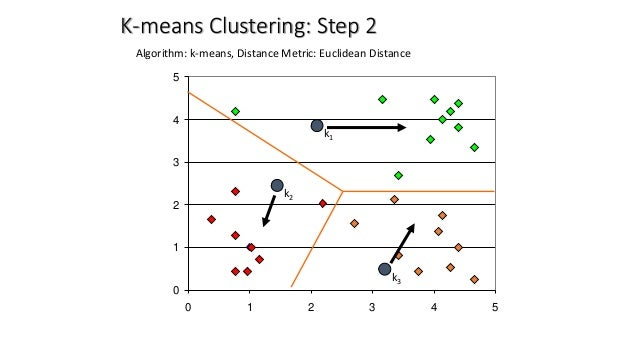

In [2]:
Image('https://image.slidesharecdn.com/patternrecognitionbinoy-06-kmeansclustering-160317135729/95/pattern-recognition-binoy-k-means-clustering-13-638.jpg')

### K-Means Clustering

- 군집화에서 가장 대중적으로 사용되는 알고리즘입니다. 

- **centroid라는 중점을 기준으로 가장 가까운 포인트들을 선택하는 군집화** 기법입니다.

- 뒤섞여 있는 데이터를 원하는 갯수로 군집화 합니다.

**사용되는 예제**

- 스팸 문자 분류
- 뉴스 기사 분류

### KMeans의 단점



1. 찍을 센터점의 갯수를 지정해야 한다.  
카테고리의 갯수를 무조건 지정해야 한다.  
분류해야할 클래스의 갯수를 전혀 모르는 데이터에도 반드시 문법적으로 이 부분이 진행되어야 하는 점은 다소 아쉬운 점으로 남는다.  




  
2. 이 부분은 코드를 돌려보고 반드시 직접 그 지점을 정리해 놓도록 한다.


In [3]:
from sklearn.cluster import KMeans

In [4]:
raw_data = [[7,1], [2,1], [4,2], [9,4], [10,5], [10,6], [11,5], [11,6], [15,3], [15,2] ,[16,4], [16,1]]
df = pd.DataFrame(columns=('x', 'y'))

df = pd.DataFrame(raw_data,columns=('x', 'y'))
df

,x,y
0,7,1
1,2,1
2,4,2
3,9,4
4,10,5
5,10,6
6,11,5
7,11,6
8,15,3
9,15,2


C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


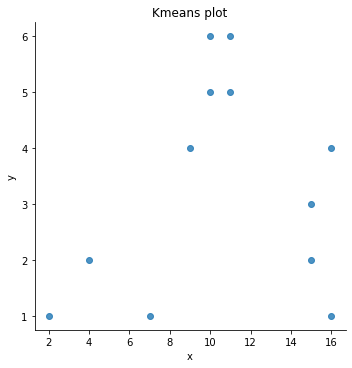

In [6]:
sns.lmplot('x', 'y', data = df, fit_reg = False)

plt.title('Kmeans plot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [7]:
data_points = df.values

In [8]:
km = KMeans(n_clusters = 3) # cluster = 군집 몇개 만들건지 선언
km

KMeans(n_clusters=3)

In [10]:
km.fit_transform(data_points)
km.labels_

array([2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1])

In [11]:
df['cluster_id'] = km.labels_
df

,x,y,cluster_id
0,7,1,2
1,2,1,2
2,4,2,2
3,9,4,0
4,10,5,0
5,10,6,0
6,11,5,0
7,11,6,0
8,15,3,1
9,15,2,1


In [24]:
centers = km.cluster_centers_

## 군집화된 데이타들의 시각화


C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


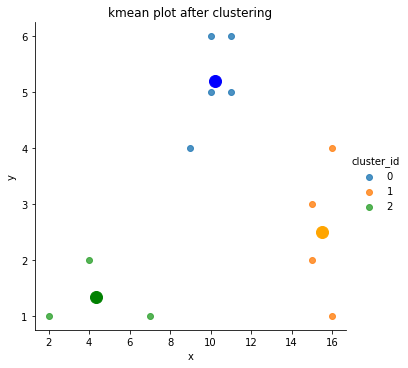

In [25]:
sns.lmplot('x', 'y', data=df, fit_reg=False,hue='cluster_id')


plt.plot(centers[0][0], centers[0][1], 'bo', markersize=12)
plt.plot(centers[1][0], centers[1][1], 'o', color='orange', markersize=12)
plt.plot(centers[2][0], centers[2][1], 'go', markersize=12)

plt.title('kmean plot after clustering')
plt.show()

## IRIS 데이타를 이용한 KMeans Clustering

In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt
import seaborn as sns
from sklearn import datasets
import pandas as pd
from pandas import DataFrame

In [17]:
iris = sns.load_dataset('iris')
kmeans = KMeans(n_clusters = 3, max_iter = 100) # max_iter => 센트로이드 이동할 수 있는 스텝을 의미한다.

In [19]:
cluster = kmeans.fit_transform(iris.loc[:, 'sepal_length' : 'petal_width'])
cluster[:5]

array([[3.41925061, 0.14135063, 5.0595416 ],
       [3.39857426, 0.44763825, 5.11494335],
       [3.56935666, 0.4171091 , 5.27935534],
       [3.42240962, 0.52533799, 5.15358977],
       [3.46726403, 0.18862662, 5.10433388]])

In [21]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [26]:
center_iris = kmeans.cluster_centers_
print(center_iris)

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


### 시각화

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'iris Data')

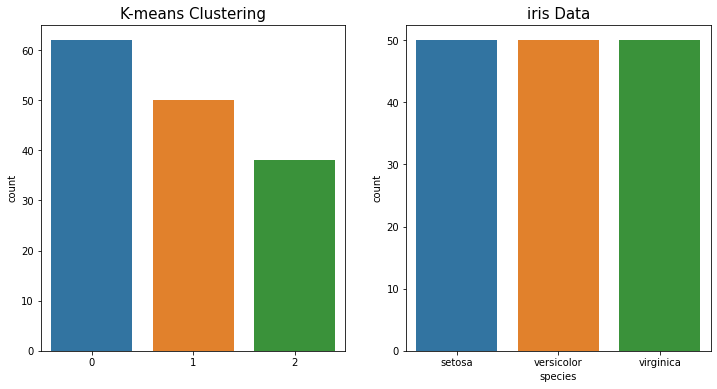

In [30]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(kmeans.labels_)
plt.title('K-means Clustering', fontsize = 15)

plt.subplot(1, 2, 2)
sns.countplot(iris['species'])
plt.title('iris Data', fontsize = 15)

<Figure size 720x576 with 0 Axes>

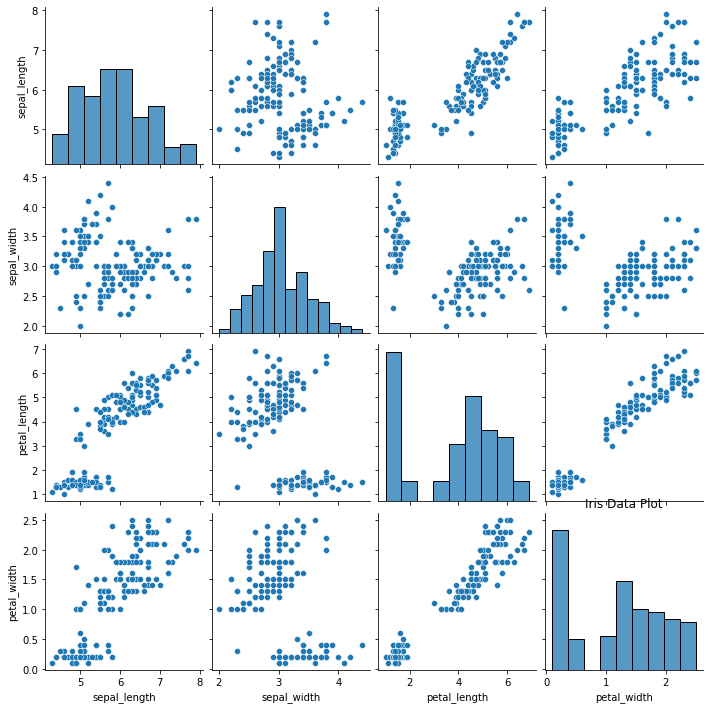

In [31]:
plt.figure(figsize=(10, 8))
sns.pairplot(iris)
plt.title('Iris Data Plot')
plt.show()

<Figure size 720x576 with 0 Axes>

C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47196 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 54408 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51012 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47448 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-

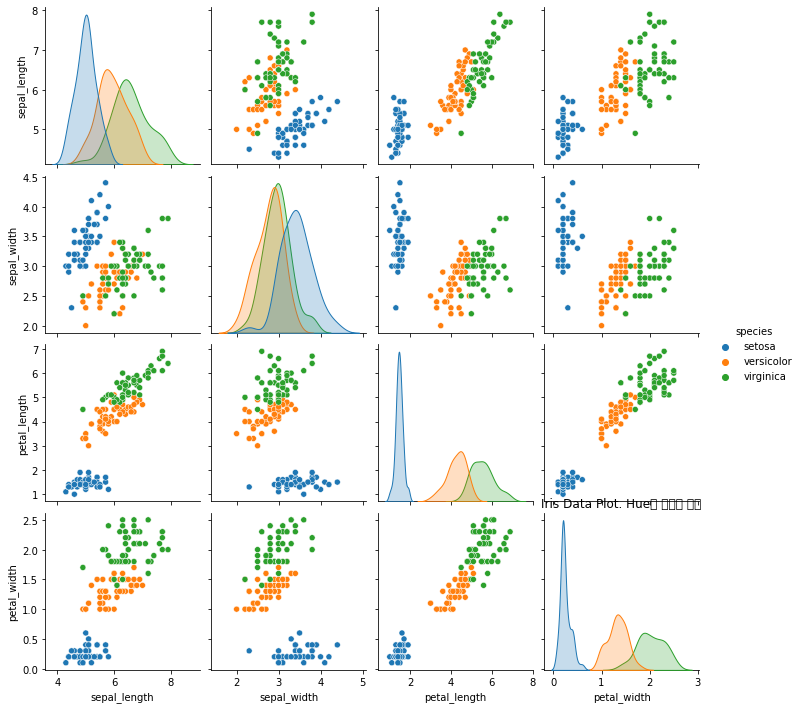

In [32]:
plt.figure(figsize=(10, 8))
sns.pairplot(iris, hue = 'species')
plt.title('Iris Data Plot. Hue로 품종을 분류')
plt.show()

### 위에서 언급한 K-means 가장 큰 단점

위처럼 붙어있는 데이터들이 있다면 그것을 정확하게 분류하기가 어렵다.  


위에서 setosa같은 경우는 따로 떨어져 있지만, versicolor나 virginica같은 경우는 서로 붙어있기 때문에 이를 정확하게 나누기가 어렵고, 이는 중앙값 기준으로 분리하는 K-means의 치명적인 단점이라고 할 수 있다.